<h1>Exploratory Data Analysis & Data Cleaning </h1>

In [67]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#Load the dataset

customer_data = pd.read_csv('Data\ml_case_training_data.csv')
pricing_data = pd.read_csv('Data\ml_case_training_hist_data.csv')
churn_status = pd.read_csv('Data\ml_case_training_output.csv')

In [69]:
customer_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [70]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

Customer data has missing values for some fields as the non-null count is lower in some fields. Also, the dataset has both numeric and non-numeric fields. Data types conversion would be required for fields containing dates.

<h4>Data Type Exploration & Conversion </h4>

In [71]:
customer_data['date_activ'] = pd.to_datetime(customer_data['date_activ'], format='%Y-%m-%d')
customer_data['date_end'] = pd.to_datetime(customer_data['date_end'], format='%Y-%m-%d')
customer_data['date_first_activ'] = pd.to_datetime(customer_data['date_first_activ'], format='%Y-%m-%d')
customer_data['date_modif_prod'] = pd.to_datetime(customer_data['date_modif_prod'], format='%Y-%m-%d')
customer_data['date_renewal'] = pd.to_datetime(customer_data['date_renewal'], format='%Y-%m-%d')

customer_data.dtypes

id                                  object
activity_new                        object
campaign_disc_ele                  float64
channel_sales                       object
cons_12m                             int64
cons_gas_12m                         int64
cons_last_month                      int64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_first_activ            datetime64[ns]
date_modif_prod             datetime64[ns]
date_renewal                datetime64[ns]
forecast_base_bill_ele             float64
forecast_base_bill_year            float64
forecast_bill_12m                  float64
forecast_cons                      float64
forecast_cons_12m                  float64
forecast_cons_year                   int64
forecast_discount_energy           float64
forecast_meter_rent_12m            float64
forecast_price_energy_p1           float64
forecast_price_energy_p2           float64
forecast_price_pow_p1              float64
has_gas    

Exploring the fields with object datatype to see if those are categorical data

In [72]:
customer_data['activity_new'].value_counts()

apdekpcbwosbxepsfxclislboipuxpop    1577
kkklcdamwfafdcfwofuscwfwadblfmce     422
kwuslieomapmswolewpobpplkaooaaew     230
fmwdwsxillemwbbwelxsampiuwwpcdcb     219
ckfxocssowaeipxueikxcmaxdmcduxsa     189
                                    ... 
wmmewikwxokcsaabsuomspccidbawxaf       1
xpxablssppduwokmopsaoemoueasdmmm       1
eddebmodfooxxwfaslcswiepfmaoxxss       1
kleicdldcamuaislmkwowllimpblacpf       1
ksukukiwxdxwbfwaapmuwippflemumlp       1
Name: activity_new, Length: 419, dtype: int64

There are 419 different values for 'activity_new' field. It represents the category of the company's activity. However, 419 is a large number of categories. 

In [73]:
customer_data['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7377
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [74]:
customer_data['has_gas'].value_counts()

f    13132
t     2964
Name: has_gas, dtype: int64

In [75]:
customer_data['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7825
kamkkxfxxuwbdslkwifmmcsiusiuosws    4517
ldkssxwpmemidmecebumciepifcamkci    3664
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

<h4>Data Statistics</h4>

In [76]:
customer_data.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


We later see that campaign_disc_ele variable is empty.

<h4> Variable Distributions </h4>

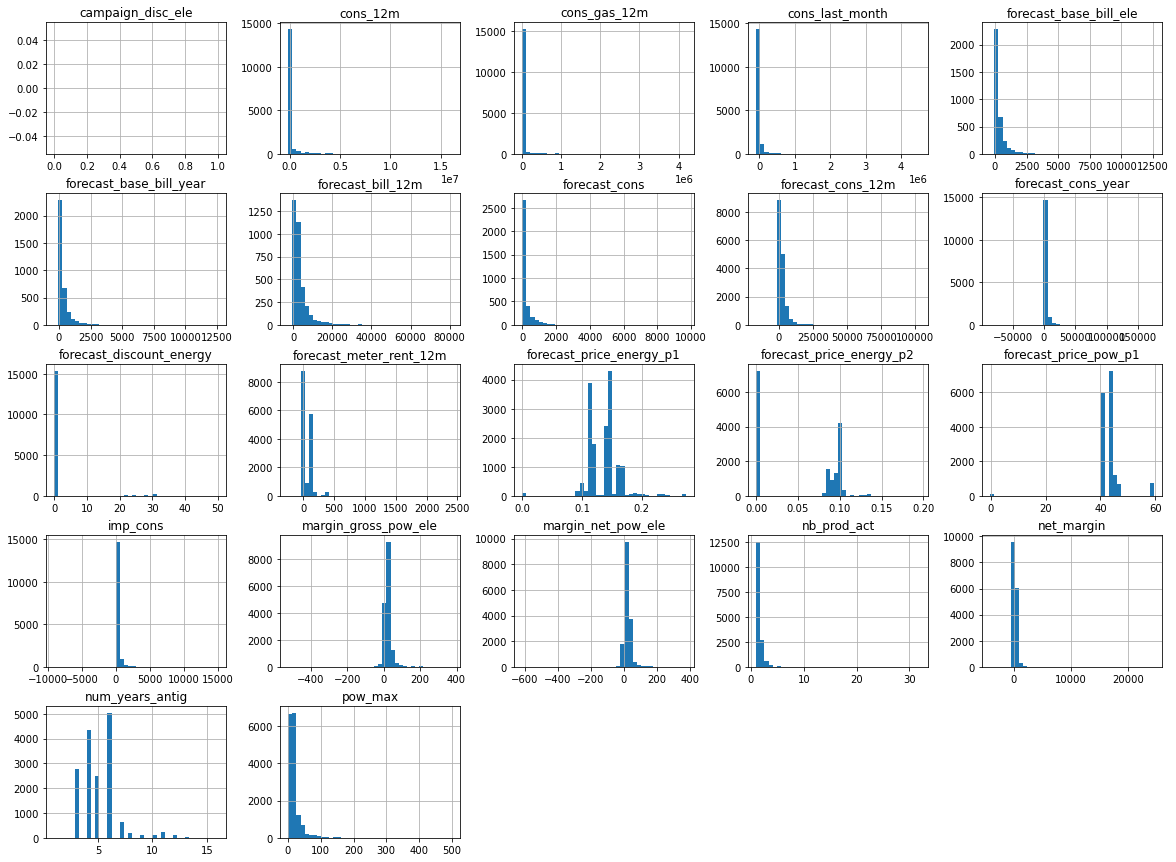

In [77]:
%matplotlib inline 
customer_data.hist(bins=40, figsize=(20,15))
plt.show()

It appears that in most numerical fields, the largest bin has values either zero or closer to zero. campaign_disc_ele field has no data. Many histograms are skewed to right. Each field has a different range of values. While fields like cons_12m has a large scale, nb_prod_act has a smaller scale. 

<h4> Outliers </h4>
Outliers can be observed from the above histograms. As data seems skewed for some variables, there might be possible outliers. Can also use boxplots to explore outliers further.

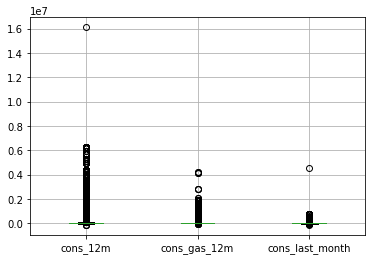

In [78]:
%matplotlib inline 
#customer_data.boxplot( figsize=(20,15))
customer_data.boxplot(column = ['cons_12m','cons_gas_12m','cons_last_month'])
plt.show()

These variables have few outliers. Since there are only few, we can remove these instances from the dataset later.

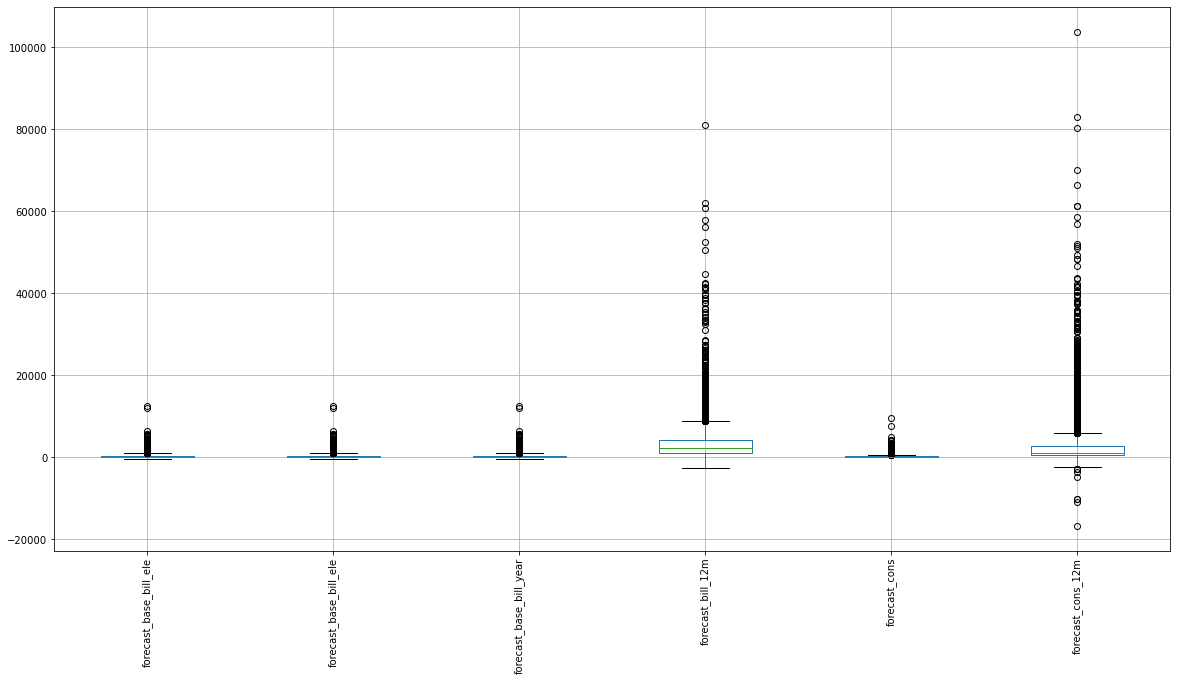

In [79]:
%matplotlib inline 
#customer_data.boxplot( figsize=(20,15))
customer_data.boxplot(column = ['forecast_base_bill_ele','forecast_base_bill_ele', 'forecast_base_bill_year','forecast_bill_12m','forecast_cons','forecast_cons_12m'], figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

Can explore other variable in this way using boxplots. Also, the basic statistics generated using the .describe() method earlier indicates outliers, especially comparing the max value with the values of 75% quartile.
We earlier counted the number of instances from each category for the categorical variable. There some categories had 1 or 2 instances when other categories had higher number of instances. Those can also be recognized as outliers.

<h4>Duplicates</h4>

In [80]:
#Exclude the id variable and find and drop the instances where all variable values are similar, ie, similar rows
dup_removed = customer_data.drop('id', axis=1).drop_duplicates()
dup_removed.shape

(16096, 31)

Number of rows have not changed, and it is similar to custmer_data. So no duplicate rows have existed.

In [81]:
#Anotherway to check duplicates
customer_data[customer_data.duplicated()]

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max


<h4>Multicollinearity</h4>

In [82]:
#Pearson Correlation. Calculates pairwise correlation between pairs of variable excluding null values
corr_df = customer_data.corr()
corr_df

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
campaign_disc_ele,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cons_12m,NaN,1.000000,0.471233,0.919545,0.132991,0.132991,0.149023,0.133147,0.165168,0.139526,...,-0.033546,0.146758,-0.025418,0.139353,-0.065500,-0.045779,0.308567,0.120491,0.008810,0.102423
cons_gas_12m,NaN,0.471233,1.000000,0.447209,0.085733,0.085733,0.083604,0.076854,0.059525,0.057619,...,-0.022416,0.078456,-0.027193,0.060609,-0.016867,-0.008242,0.272005,0.058930,-0.008626,0.052365
cons_last_month,NaN,0.919545,0.447209,1.000000,0.136207,0.136207,0.134066,0.136816,0.129574,0.151476,...,-0.024242,0.123164,-0.020057,0.153861,-0.054114,-0.037696,0.350711,0.096424,0.004860,0.089565
forecast_base_bill_ele,NaN,0.132991,0.085733,0.136207,1.000000,1.000000,0.794776,0.964402,0.750961,0.958303,...,-0.223693,0.351376,0.106436,0.964402,-0.088898,-0.054790,0.051419,0.468836,0.021869,0.585426
forecast_base_bill_year,NaN,0.132991,0.085733,0.136207,1.000000,1.000000,0.794776,0.964402,0.750961,0.958303,...,-0.223693,0.351376,0.106436,0.964402,-0.088898,-0.054790,0.051419,0.468836,0.021869,0.585426
forecast_bill_12m,NaN,0.149023,0.083604,0.134066,0.794776,0.794776,1.000000,0.751430,0.970487,0.797272,...,-0.258372,0.376494,0.147365,0.751430,-0.129388,-0.086826,0.050683,0.656937,0.029917,0.711502
forecast_cons,NaN,0.133147,0.076854,0.136816,0.964402,0.964402,0.751430,1.000000,0.758825,0.974419,...,-0.166692,0.290593,0.074713,1.000000,-0.111186,-0.075863,0.055135,0.489346,0.006925,0.457566
forecast_cons_12m,NaN,0.165168,0.059525,0.129574,0.750961,0.750961,0.970487,0.758825,1.000000,0.746076,...,-0.217315,0.245845,0.058169,0.725550,-0.184179,-0.141642,0.013283,0.768871,0.064431,0.583119
forecast_cons_year,NaN,0.139526,0.057619,0.151476,0.958303,0.958303,0.797272,0.974419,0.746076,1.000000,...,-0.206041,0.225691,0.053678,0.981732,-0.139177,-0.106576,0.013811,0.537701,0.066105,0.442228


It can be seen from the above matrix that some pairs of variables have a very high positive correlation(>=0.9): Eg: cons_last_month and cons_12m, forecast_base_bill_ele and forecast_base_bill_year, forecast_base_bill_ele and forecast_cons, forecast_base_bill_ele and forecast_cons_year, forecast_base_bill_ele and imp_cons, forecast_base_bill_year and forecast_cons, forecast_base_bill_year and forecast_cons_year, forecast_base_bill_year and imp_cons, 
forecast_bill_12m and forecast_cons_12m, forecast_cons and forecast_cons_year, forecast_cons and imp_cons,

Some pairs of variables have a high positive correlation(=0.7): Eg: forecast_base_bill_ele and forecast_bill_12m, forecast_base_bill_ele and forecast_cons_12m, forecast_base_bill_year and forecast_bill_12m, forecast_base_bill_year and forecast_cons_12m, forecast_bill_12m and forecast_base_bill_ele, forecast_bill_12m and forecast_base_bill_year, forecast_bill_12m and forecast_cons, forecast_bill_12m and forecast_cons_year, forecast_bill_12m and imp_cons, forecast_bill_12m and pow_max, forecast_cons and forecast_cons_12m, 
*some of these fields have a lot of missing values. As we see later, the missing values belong to same rows.


Combining customer_data(possible predictor variables) with churn_status (response variable)

In [83]:
merged_customer_churn = pd.merge(customer_data, churn_status, on = "id", how = "inner")
merged_customer_churn.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaT,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaT,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaT,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [84]:
#Calculating correlation between churn variable and other predictor variables
corr_df = merged_customer_churn.corr()
corr_df['churn'].sort_values(ascending=False)

churn                       1.000000
margin_gross_pow_ele        0.080158
margin_net_pow_ele          0.063187
forecast_meter_rent_12m     0.029971
net_margin                  0.029308
forecast_price_energy_p2    0.025597
forecast_discount_energy    0.012344
pow_max                     0.009456
forecast_cons_12m           0.007395
forecast_bill_12m           0.006909
forecast_price_pow_p1       0.004034
imp_cons                    0.003417
forecast_cons_year          0.002756
forecast_base_bill_year     0.000433
forecast_base_bill_ele      0.000433
forecast_price_energy_p1   -0.003337
forecast_cons              -0.005247
nb_prod_act                -0.022609
cons_gas_12m               -0.040880
cons_last_month            -0.046931
cons_12m                   -0.051759
num_years_antig            -0.071565
campaign_disc_ele                NaN
Name: churn, dtype: float64

There doesn't seem to be any high positive or high negative correlation between the churn values and other variables. 

Churn vs retention percentages in the dataset:

In [85]:
merged_customer_churn['churn'].value_counts()/len(merged_customer_churn.index)*100

0    90.090706
1     9.909294
Name: churn, dtype: float64

There is around 10% of churned customers and 90% of retention 

<h4>Missing Data</h4>

<AxesSubplot:>

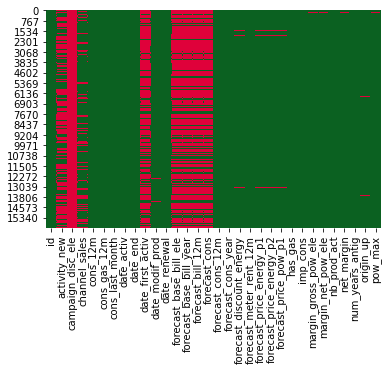

In [86]:
colours = ['#0B6121','#DF013A'] 
sns.heatmap(customer_data.isnull(), cmap=sns.color_palette(colours),cbar=False)
#sns.heatmap(customer_data.isnull(), cbar=False)

Red indicates missing data and green indicates non-missing data in this heatmap. It can be seen that some fields/columns have a large portions of missing data, especially, activity_new, campaign_disc_ele, channel_sales, date_first_activ, forecast_base_bill_ele, forecast_base_bill_year,forecast_bill_12m, forecast_cons. It can also be observed that there's a possible correlation in the missing data locations of the date_first_activ, forecast_base_bill_ele, forecast_base_bill_year,forecast_bill_12m and forecast_cons columns. 

In [87]:
for col in customer_data.columns:
    missing_cells = customer_data[col].isnull().sum()
    print( '{} - {}%'.format(col, round((missing_cells/customer_data.shape[0])*100,2)))  
    #print( '{} - {}'.format(col, missing_cells))

id - 0.0%
activity_new - 59.3%
campaign_disc_ele - 100.0%
channel_sales - 26.21%
cons_12m - 0.0%
cons_gas_12m - 0.0%
cons_last_month - 0.0%
date_activ - 0.0%
date_end - 0.01%
date_first_activ - 78.21%
date_modif_prod - 0.98%
date_renewal - 0.25%
forecast_base_bill_ele - 78.21%
forecast_base_bill_year - 78.21%
forecast_bill_12m - 78.21%
forecast_cons - 78.21%
forecast_cons_12m - 0.0%
forecast_cons_year - 0.0%
forecast_discount_energy - 0.78%
forecast_meter_rent_12m - 0.0%
forecast_price_energy_p1 - 0.78%
forecast_price_energy_p2 - 0.78%
forecast_price_pow_p1 - 0.78%
has_gas - 0.0%
imp_cons - 0.0%
margin_gross_pow_ele - 0.08%
margin_net_pow_ele - 0.08%
nb_prod_act - 0.0%
net_margin - 0.09%
num_years_antig - 0.0%
origin_up - 0.54%
pow_max - 0.02%


To handle the missing data, we can consider either to drop the features or to impute values. campaign_disc_ele feature can be dropped as it's missing data percentage is 100%. 
Also, date_first_activ, forecast_base_bill_ele, forecast_base_bill_year,forecast_bill_12m, forecast_cons all has 78% of missing data. As it is a higher percentage those columns can be dropped. Since it was earlier observed from the heatmap that the missing values of these columns belong to similar rows, it can be considered to drop the rows instead of the columns. However, since 78% is a high percentage, dropping the rows will substantially reduce the number of instances in the dataset. Hence, columns are dropped. 
For other columns with missing data, data imputation strategies are explored.


In [88]:
customer_data.drop(columns = ['campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele', 'forecast_base_bill_year','forecast_bill_12m', 'forecast_cons'])

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,2015-06-23,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


activity_new : This variable represents the category of the company's activity. Hence, missing data are filled with 'miscellaneous' to indicate that no category is assigned.
channel_sales: This variable represents the code of the sales channel. It is also categorical. Missing data are filled with 'noinfo' to indicate that no category is assigned.

In [89]:
customer_data['activity_new'].fillna('miscellaneous',inplace=True) 
customer_data['channel_sales'].fillna('noinfo',inplace=True) 

date_modif_prod: date of last modification of the product. Nearly 1% missing data in this variable may indicate that the product is not modified or the data is actually missing. 
date_end, date_renewal also has missing data.
Can replace the missing values with the most common value. Cannot use median as this is a date data type. 

In [90]:
customer_data['date_modif_prod'].fillna(customer_data['date_modif_prod'].value_counts().index[0], inplace=True)
customer_data['date_end'].fillna(customer_data['date_end'].value_counts().index[0], inplace=True)
customer_data['date_renewal'].fillna(customer_data['date_renewal'].value_counts().index[0], inplace=True)

forecast_discount_energy, forecast_price_energy_p1, forecast_price_energy_p2 and forecast_price_pow_p1 variables have 1% missing data. Since all these variable are regrding forecasted values, we could first explore if missing values of each variable belong to same row (instance). 

In [91]:
bool_null = pd.isnull(customer_data[['forecast_discount_energy', 'forecast_price_energy_p1', 'forecast_price_energy_p2','forecast_price_pow_p1']])
bool_null.sum()

forecast_discount_energy    126
forecast_price_energy_p1    126
forecast_price_energy_p2    126
forecast_price_pow_p1       126
dtype: int64

In [92]:
bool_null.loc[bool_null['forecast_discount_energy'] == True]

,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1
26,True,True,True,True
83,True,True,True,True
512,True,True,True,True
598,True,True,True,True
622,True,True,True,True
...,...,...,...,...
15561,True,True,True,True
15653,True,True,True,True
15706,True,True,True,True
15719,True,True,True,True


The rows (instances) can be removed from the dataset as missing data of each of these variable belong to the same row. Corresponding instances have to be removed from the other two datasets also.


origin_up: code of the electricity campaign the customer first subscribed to. 1% data is missing. origin_up is a categorical variable. Missing data can be imputed by 'missingcampaign'

In [93]:
customer_data['origin_up'].fillna('missingcampaign',inplace=True) 

<h5> Exploring price history data (pricing_data) </h5>

In [94]:
pricing_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [95]:
pricing_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


There doesn't seem to be any missing data. Also, there doesn't seem to be outliers.

In [96]:
pricing_data['id'].value_counts()

b85ee590f4f0f02db00241d1b330f5b2    12
8bb259c813e29ef12a72a919945a6882    12
999c6f03d0d1bded3e39fa468276410b    12
02bc25539c18998a24dbc0bcc60d82f2    12
e17565af1a1d3b651e7199aab2dcae8f    12
                                    ..
3e459d61dc831e29f8a9a9a59f95efd2     8
83cf18b07114e495ae8b7fb235e45ee2     8
15b36e47cf04bf151e3f4438d12672e5     7
c5dcd5c506e565aaabffa29bc1ec0a37     7
bf89f2d8c1b133a134fd93603cb4c947     7
Name: id, Length: 16096, dtype: int64

Length of the price history seem to be different for customers ranging between 12 to 7

In [97]:
pd.DataFrame ({ "Missing data Percentage (%)" : pricing_data.isnull().sum()/len(pricing_data.index)*100})

,Missing data Percentage (%)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


This dataset has smaller percentages of missing data in all variables.
Fill missing values with median:

In [98]:
pricing_data['price_p1_var'].fillna(pricing_data['price_p1_var'].median(), inplace=True)
pricing_data['price_p2_var'].fillna(pricing_data['price_p2_var'].median(), inplace=True)
pricing_data['price_p3_var'].fillna(pricing_data['price_p3_var'].median(), inplace=True)
pricing_data['price_p1_fix'].fillna(pricing_data['price_p1_fix'].median(), inplace=True)
pricing_data['price_p2_fix'].fillna(pricing_data['price_p2_fix'].median(), inplace=True)
pricing_data['price_p3_fix'].fillna(pricing_data['price_p3_fix'].median(), inplace=True)